## **Dataset Overview**

This dataset tracks medical appointments from Brazil, with a focus on whether patients keep their appointments. It includes 100,000 records, each capturing details about the appointment and patient, to explore what factors might influence no-shows.

## **Column Details**

1. **PatientId**: Unique identifier for each patient.
2. **AppointmentID**: Unique identifier for each appointment.
3. **Gender**: Indicates the gender of the patient (Male/Female).
4. **AppointmentDay**: The scheduled date for the patient’s doctor visit.
5. **ScheduledDay**: The date when the appointment was booked.
6. **Age**: Patient's age.
7. **Neighbourhood**: The location of the medical facility.
8. **Scholarship**: Boolean value indicating whether the patient is enrolled in the Bolsa Família welfare program.
9. **Hypertension**: Whether the patient has been diagnosed with hypertension (True/False).
10. **Diabetes**: Whether the patient has been diagnosed with diabetes (True/False).
11. **Alcoholism**: Indicates if the patient has a history of alcoholism (True/False).
12. **Handicap**: Whether the patient has a disability (True/False).
13. **SMS_received**: Number of reminder messages sent to the patient.
14. **No-show**: Whether the patient attended the appointment (True = Did not attend, False = Attended).

---

## **Exploratory Data Analysis (EDA) Questions**

### Q1: How does the hospital attendance of male patients compare to female patients, and which gender tends to miss appointments more often?

### Q2: What role do reminder SMS notifications play in reducing appointment no-shows? Is there any link between the time interval before the appointment and patient attendance?

### Q3: How does being part of the Bolsa Família program affect the likelihood of attending medical appointments? Are certain age groups more influenced by this factor?

### Q4: Do specific medical conditions, like hypertension or diabetes, impact appointment attendance? Is this effect more pronounced in one gender over the other?


# **Import library**


In [77]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#getting the csv file 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# **Data Wrangling**


In [78]:
#loadig the dataset from the csv file
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


In [79]:
data.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [80]:
# viweing main information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [81]:
#checking for duplicates
data.duplicated().sum()


0

In [82]:
#exploring the unique values in the dataset
data.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [83]:
#exploring the handcap values
data['Handcap'].value_counts()


Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [84]:
#exploring age column distribution
data['Age'].describe()


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# **Data Cleaning**


In [85]:
# dropping columns and validating changes
data.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
data.columns


Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [86]:
data.AppointmentDay.unique


<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [87]:
# extracting only day, month and year values
data['ScheduledDay'] = data['ScheduledDay'].str[:10]
data['AppointmentDay'] = data['AppointmentDay'].str[:10]

# changing data type
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# confirming changes
print(data[['AppointmentDay', 'ScheduledDay']].dtypes)
data.head()


AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
# making a new due day column
data['DueDay'] = data['AppointmentDay'] - data['ScheduledDay']

# converting data type 
data['DueDay'] = data['DueDay'].dt.days

# drop sch and appoint col
data.drop(['AppointmentDay','ScheduledDay'], axis=1, inplace=True)


In [89]:
# viewing summary statistics
data['DueDay'].describe()


count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DueDay, dtype: float64

In [90]:
# viewing negative days values
data[data['DueDay'] < 0]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDay
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [91]:
# dropping these values and confirming changes
data.drop(data[data['DueDay'] < 0].index, inplace=True)
data['DueDay'].describe()


count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: DueDay, dtype: float64

In [92]:
# converting column and confirming changes
data['Gender'] = data['Gender'].astype('category')

data['Gender'].dtype


CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

In [93]:
#converting columns and bool and confirming changes

cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
data[cols] = data[cols].astype('bool')
data[cols].dtypes


Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [94]:
# mapping values to be more familiar

data.loc[data['No-show'] == 'Yes','No-show'] = 0
data.loc[data['No-show'] == 'No','No-show'] = 1

# casting dt type and confirming changes
data['No-show'] = data['No-show'].astype(bool)
data['No-show'].dtypes


dtype('bool')

In [95]:
# viewing rows with values of handcap >1
data[data['Handcap'] > 1]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDay
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [96]:
# filling the bigger values with 1
data.loc[data['Handcap'] > 1, 'Handcap'] = 1

# confirming changes
data['Handcap'] = data['Handcap'].astype('bool')
data['Handcap'].unique()


array([False,  True])

In [97]:
# exploring values below 0
data[data['Age'] < 0]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDay
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [98]:
# dropping row with negative age and confirming changes
data.drop(data[data['Age'] < 0].index, inplace=True)
data[data['Age'] < 0]


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDay


In [99]:
data.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DueDay
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [100]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  DueDay         110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB


# Data Visualization and EDA


In [101]:
# setting seaborn configurations
sns.set_style('darkgrid')


### **How often do men go to hospitals compared to women? Which of them is more likely to show up?**


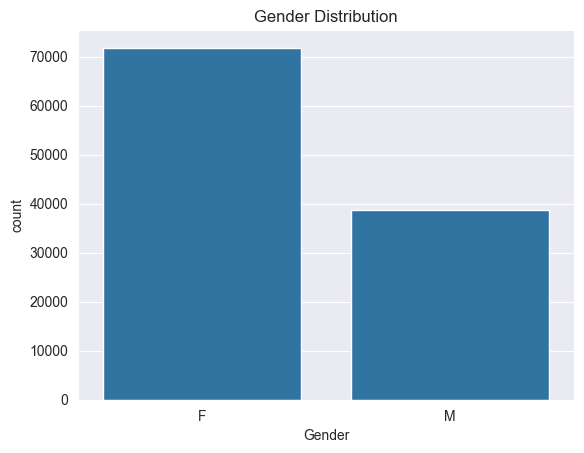

In [102]:
# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = data)
plt.title("Gender Distribution")
plt.show()


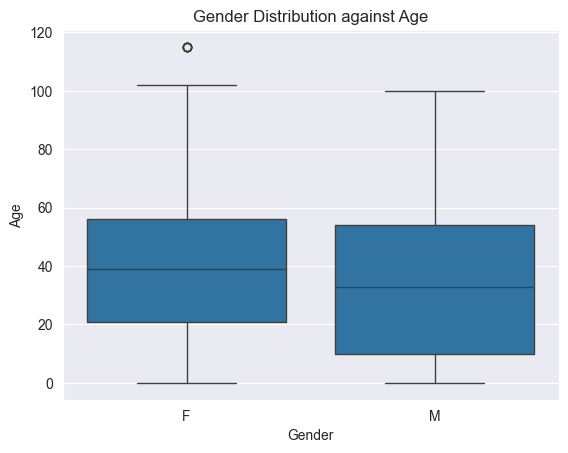

In [103]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'Gender',y = 'Age',data = data)
plt.title("Gender Distribution against Age")
plt.show()


In [104]:
data['No-show'].value_counts()


No-show
True     88207
False    22314
Name: count, dtype: int64

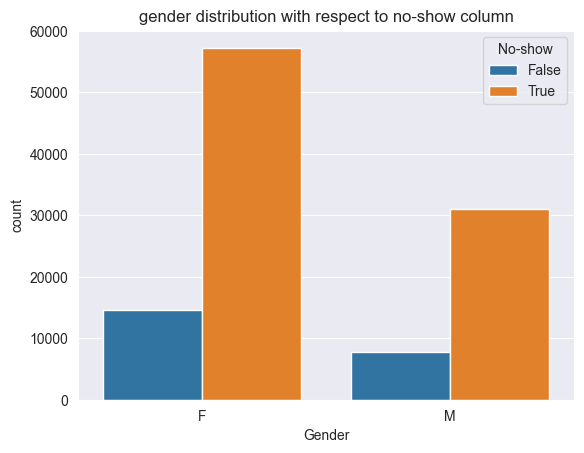

In [105]:
# showing the gender distribution with respect to no-show column
sns.countplot(x = 'Gender', hue = 'No-show', data = data)
plt.title("gender distribution with respect to no-show column")
plt.show()


### **Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?**


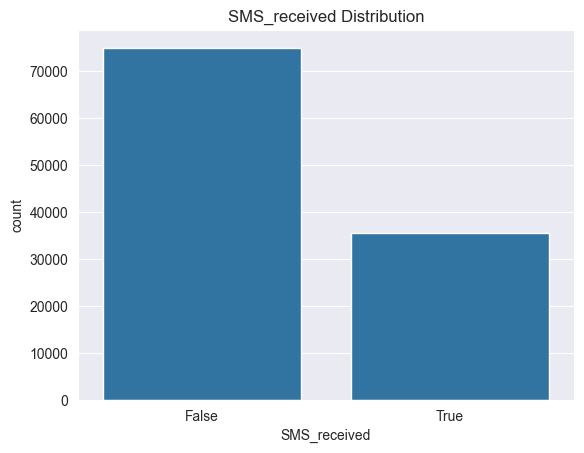

In [106]:
# viewing count plot of recieving sms distribution in our dataset
sns.countplot(x = 'SMS_received', data = data)
plt.title("SMS_received Distribution")
plt.show()


In [107]:
data['SMS_received'].value_counts()


SMS_received
False    75039
True     35482
Name: count, dtype: int64

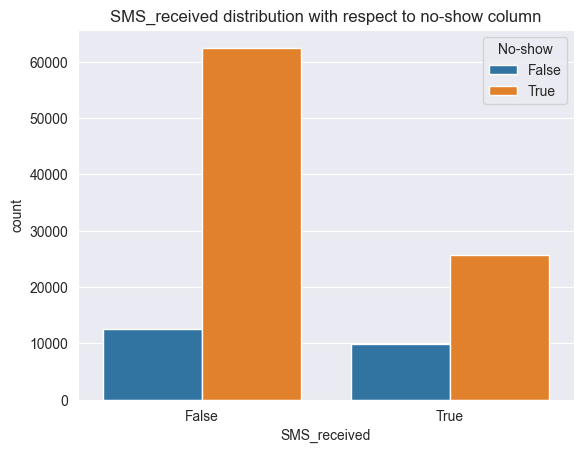

In [108]:
# showing the sms_received distribution with respect to no-show column
sns.countplot(x = 'SMS_received', hue = 'No-show', data = data)
plt.title("SMS_received distribution with respect to no-show column")
plt.show()


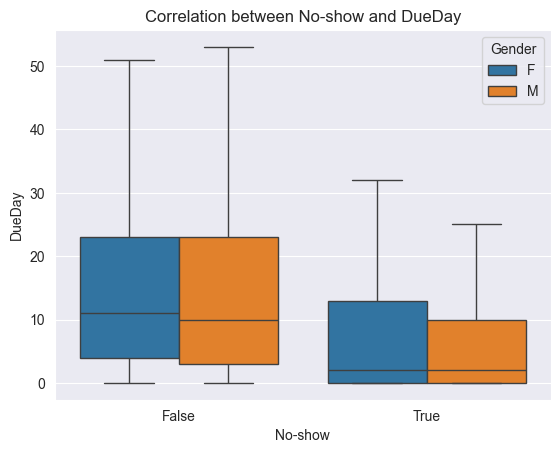

In [109]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'No-show', y = 'DueDay', data = data, hue = 'Gender',showfliers=False)

plt.title("Correlation between No-show and DueDay")
plt.show()


### **Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?**


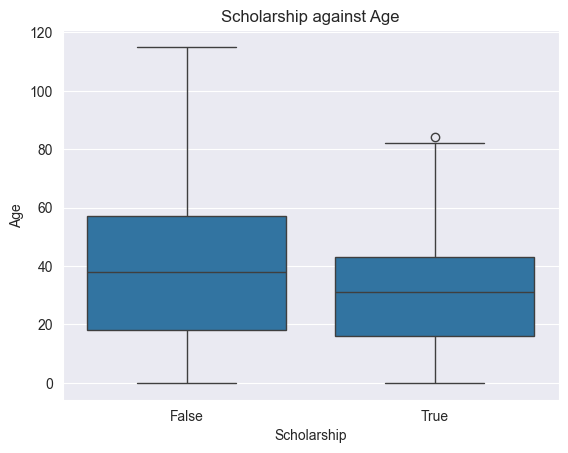

In [110]:
# plotting having a scholarship against age
sns.boxplot(x = 'Scholarship', y = 'Age', data = data)
plt.title("Scholarship against Age")
plt.show()


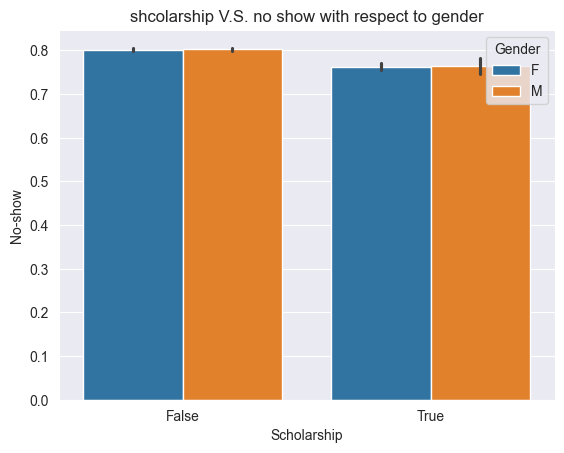

In [111]:
# plotting having a scholarship against no-show with respect to gender
sns.barplot(x = 'Scholarship', y = 'No-show', hue = 'Gender', data = data)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()


<Axes: >

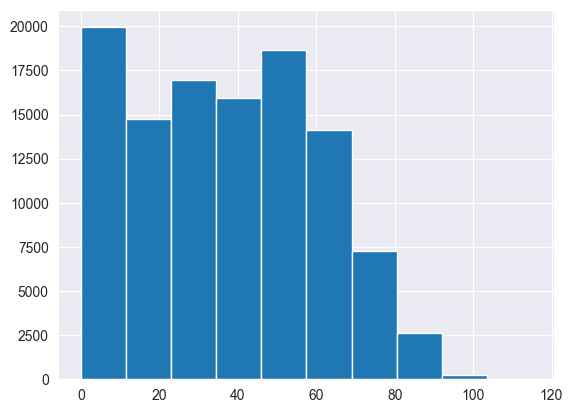

In [112]:
# ploting age destribution
data['Age'].hist()


- It is evident that having a scholarship has minimal impact on attending doctor appointments. Additionally, a large age group benefits from the scholarship program, and many of these individuals also enroll their children in it.


---

### **Does having certain deseas affects whather or not a patient may show up to their appointment? is it affected by gender?**


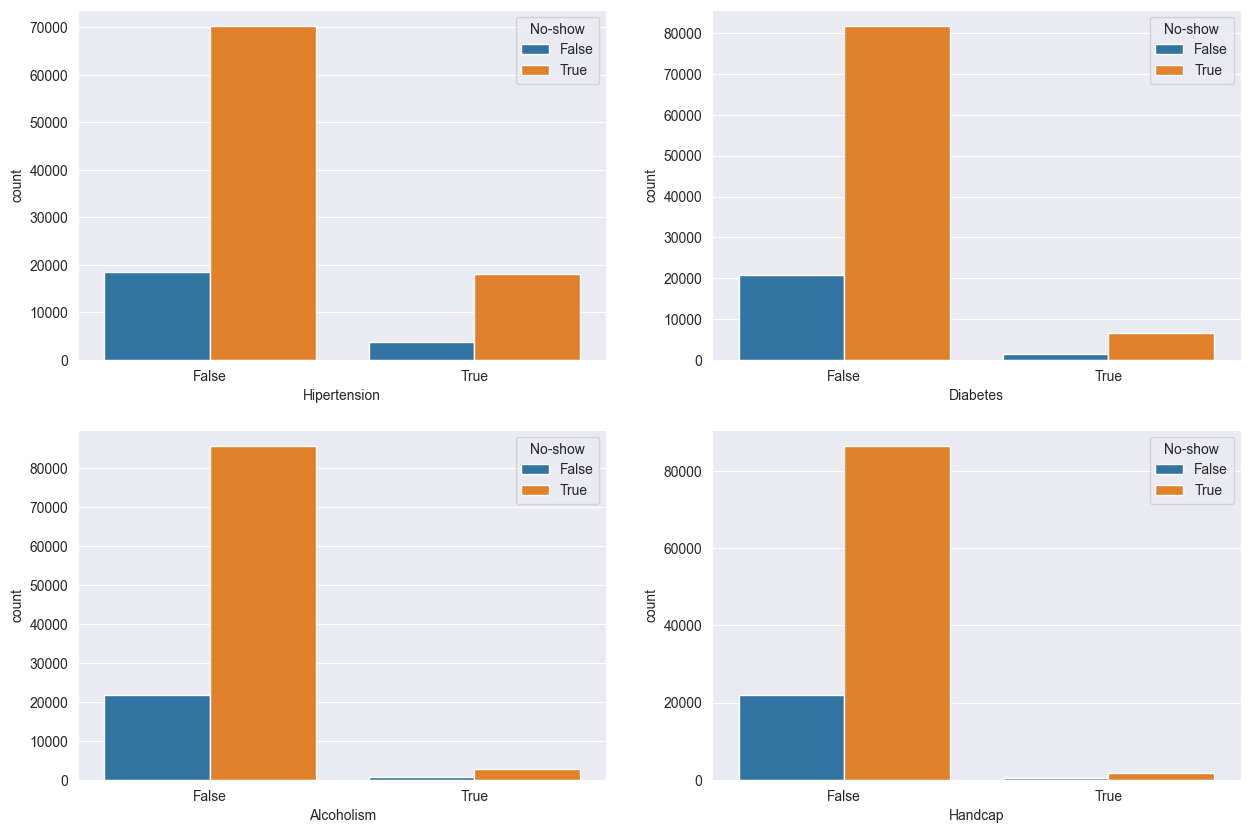

In [114]:
#plotting diseases against no show 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x='Hipertension',data =data, hue = 'No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = data, hue= 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = data, hue= 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = data, hue= 'No-show')
plt.show()


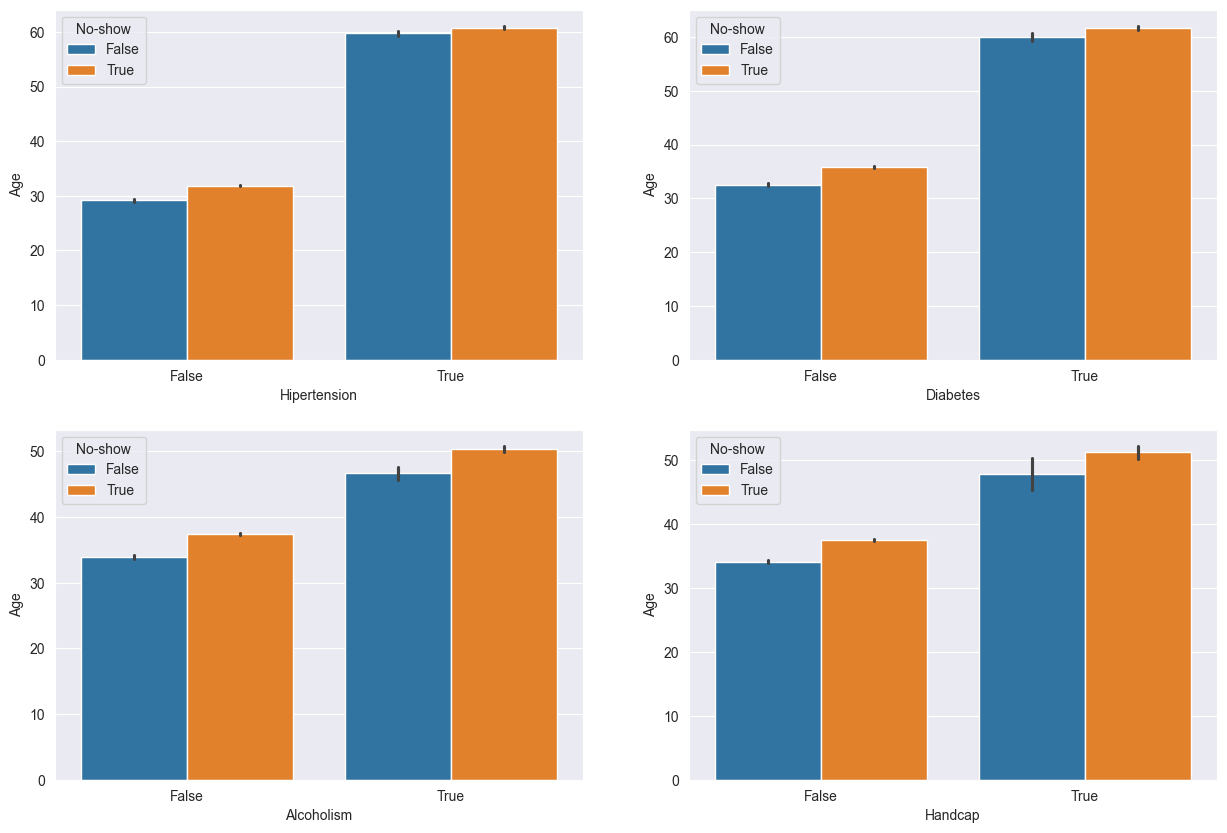

In [115]:
# plotting diseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = data, hue= 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = data, hue= 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = data, hue= 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = data, hue= 'No-show')
plt.show()


- From the previous set of plots, we can conclude that the vast majority of our dataset does not have chronic diseases. However, these diseases are present in many young individuals.
- Having a chronic disease may affect the likelihood of showing up for a hospital appointment.


# Hospital Appointment Analysis

---

## Conclusion

### Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?

Nearly half of the dataset consists of women, who exhibit a wider age distribution and some outliers, which contributes to a higher attendance rate compared to men. Overall, 79.8% of the patients attended their appointments, while 20.1% did not show up. This data indicates that women are more likely to attend their appointments compared to men. However, it is important to note that this could be influenced by the larger proportion of women present in the dataset.

---

### Q2: Does receiving an SMS reminder affect whether or not a patient shows up? Is it correlated with the number of days before the appointment?

In the analysis, it was observed that 67.8% of the patients did not receive an SMS reminder but still managed to attend their appointments. Additionally, there is a positive correlation between the number of days before the appointment and patient attendance, suggesting that patients are more likely to show up when their appointments are scheduled within a shorter timeframe, specifically within 0 to 30 days. Conversely, those with appointments scheduled further out tend to be less likely to attend. Interestingly, gender does not appear to significantly influence the relationship between the number of days before the appointment and attendance.

---

### Q3: Does having a scholarship affect attendance at hospital appointments? What age groups are impacted?

The analysis indicates that having a scholarship does not significantly impact whether a patient shows up for their appointment. However, it was noted that a large age group benefits from the scholarship program, and many of these individuals also enroll their children in it, suggesting that the program has a broader reach within the community.

---

### Q4: Does having certain diseases affect whether a patient shows up for their appointment? Is this influenced by gender?

Most patients in the dataset do not have chronic diseases, although such conditions are observed in some younger age groups. While having a chronic disease may influence the likelihood of attending a hospital appointment, the effect does not appear to be strongly influenced by gender. This implies that factors other than gender may play a more significant role in attendance rates for patients with chronic conditions.
